<center> <h1> Análisis de robos en la ciudad de Medellín </h1> </center>

<center> <h3> Resumen </h3> </center>


<p align = "justify"> Que los robos están aumentando en el Valle de Aburrá es una verdad que ya desbordó las cifras. Lo que no deja de sorprender es la manera en la que muchos de estos crímenes ocurren, a plena luz del día, en vías principales o en establecimientos públicos vigilados. ¿A qué se debe que los ladrones estén asumiendo tantos riesgos a la hora de actuar?.</p>


<p align = "justify"> El gran objetivo de este trabajo, es analizar el comportamiento de las geolocalizaciones de robos realizados en la ciudad de Medellín - Colombia, con el fin de detectar las zonas más vulnerables a partir de modelos estadísticos de procesos puntuales </p>




<h1> 1. Introducción </h1>
<p align = "justify"> Es bastante evidente que la ciudad de Medellín es fuertemente vulnerada por grupos delictivos, en consecuencia, se desea tratar el tema de los robos en la ciudad, que se caracterizan por múltiples modalidades. </p>

<p align = "justify"> En general, la seguridad de la ciudad de Medellín es un tema bastante complejo, sin embargo, la estadística permite analizar comportamientos en este tipo de actos que atentan contra la sociedad, siendo más óptimo al aplicar estadística espacial, con el fin de relacionar estos hechos a partir de datos georeferenciados, para así, poder contribuir de forma significativa en posibles medidas que puedan mitigar estas situaciones.</p>




<h1>2. Descubrimiento y entendimiento de datos </h2>

<p align = "justify"> Este conjunto de datos presenta las locaciones de puntos donde ocurrieron robos en diferentes zonas de la ciudad de Medellín, dichos registros, fueron tomados por la policía nacional.</p>
 


los datos fueron extraídos de la página de MEData, en la cuál yacen datos abiertos suministrados por la alcaldía de Medellín: [Hurtos_Medellin](http://medata.gov.co/search/field_topic/seguridad-5/type/dataset?sort_by=changed)



Cabe resaltar, que la base de datos original cuenta con un total de 271.257 registros, por la magnitud de la misma, se decide depurar los datos, filtrándo únicamente los robos  por modalidad **Atraco**, obteniendo así, un total de 130165 registros iniciales en la ciudad de Medellín.


**Las variables que se tienen en cuenta para el estudio son las siguientes:**


|**Variable**|**Descripción**|**Tipo**|**Detalle**|
|---|---|---|---|
|X|Número del registro|interger|1-1439|
|fecha_hecho|Fecha en la cual se realizó el robo|datetime|-|
|cantidad|Cantidad robos|-|-|
|latitud|Coordenada latitud de la ubicación del robo|float|-|
|longitud|Coordenada longitud de la ubicación del robo|float|-|
|sexo|sexo víctima|string|-|
|edad|Edad víctima|integer|-|
|estado_civil|Estado civíl víctima|string|-|
|grupo_actor|grupo al que pertenece|String|-|
|actividad_delictiva|historial víctima|String|-|
|parentesco|parentesco víctima|string|-|
|ocupación|A que se dedica la víctima|string|-|
|discapacidad|discapacidad víctima|string|-|
|grupo_especial|Grupo especial de la víctima|string|-|
|medio_transporte|Medio transporte usado por la víctima|string|Clases: metro, caminata, autobús, automóvil, taxi, motocicleta|
|nivel_académico|Nivel académico de la víctima|string|-|
|testigo|testigo de la víctima|string|-|
|conducta|conducta víctima|string|-|
|modalidad|modalidad de robo|integer|Clases: cosquilleo, atraco, decuido, escopolamina, agentes químicos, abuso de confianza, clonación de tarjeta, comisión de delito, forcejeo, informático, llamada millonaria, llave maestra, paquete chileno, retención de tarjeta, simulando necesidad, suplantación|
|caracterizacion|caracterización víctima|string|-|
|conducta_especial|-|-|-|
|arma_medio|Arma utilizada en el robo|string|corto punzante, arma de fuego, palanca, escopolamina, no|
|articulo_penal|-|-|-|
|categoria_penal|-|-|-|
|nombre_barrio|Barrio donde ocurrió el hecho|string|-|
|codigo_barrio|Código del Barrio donde ocurrió el hecho|interger|-|
|codigo_comuna|Código de comuna donde ocurrió el hecho|interger|-|
|lugar|Lugar donde ocurrió el hecho|string|-|
|sede_receptora|Sede policia donde se registró el hecho|string|-|
|bien|Artículo robado|string|-|
|categoría_bien|Categoría de artículo robado|string|-|
|grupo_bien|Grupo de artículo robado|string|-|
|modelo|-|-|-|
|color|-|-|-|
|permiso|-|-|-|
|unidad_medida|-|-|-|
|fecha_ingestion|-|-|-|



## Importando librerías:

In [89]:
# Manipulacion de datos...
import pandas as pd
import numpy as np
# Visualizacion de datos...
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
# Fechas......
from datetime import datetime
import pytz
# Mapas............
import geopandas as gpd
import folium
from folium.plugins import HeatMap
# No presentar advertencias......
import warnings
warnings.filterwarnings("ignore")

* Carga del dataset:

In [90]:
pd.set_option("display.max_columns",None) # Visualizar todas las columnas
datos = pd.read_csv("./Data/hurto_a_persona.csv", sep=";")
datos.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,ocupacion,discapacidad,grupo_especial,medio_transporte,nivel_academico,testigo,conducta,modalidad,caracterizacion,conducta_especial,arma_medio,articulo_penal,categoria_penal,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2018-01-01T20:30:00.000-05:00,1.0,6.278325,-75.601265,Mujer,65,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Taxi,Sin dato,Sin dato,Hurto a persona,Atraco,Sin dato,Sin dato,Arma de fuego,Sin dato,Sin dato,Cucaracho,#0718,7,Vía pública,Castilla,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00
1,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Automóvil,Sin dato,Sin dato,Hurto a persona,Rompimiento de ventana,Sin dato,No,No,Sin dato,Sin dato,Santa María de los Ángeles,#1423,14,Parqueadero,Poblado,Visa,Documentos,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00
2,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Automóvil,Sin dato,Sin dato,Hurto a persona,Rompimiento de ventana,Sin dato,No,No,Sin dato,Sin dato,Santa María de los Ángeles,#1423,14,Parqueadero,Poblado,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00
3,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Automóvil,Sin dato,Sin dato,Hurto a persona,Rompimiento de ventana,Sin dato,No,No,Sin dato,Sin dato,Santa María de los Ángeles,#1423,14,Parqueadero,Poblado,Tarjeta para computador,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00
4,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Automóvil,Sin dato,Sin dato,Hurto a persona,Rompimiento de ventana,Sin dato,No,No,Sin dato,Sin dato,Santa María de los Ángeles,#1423,14,Parqueadero,Poblado,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00


In [91]:
# Dimensionalidad de los datos...
datos.shape

(271257, 36)

* Análisis de datos faltantes.

In [92]:
datos.isnull().sum()

fecha_hecho                0
cantidad                   0
latitud                14231
longitud               14231
sexo                       0
edad                       0
estado_civil               0
grupo_actor                0
actividad_delictiva        0
parentesco                 0
ocupacion                  0
discapacidad               0
grupo_especial             0
medio_transporte           0
nivel_academico            0
testigo                    0
conducta                   0
modalidad                  0
caracterizacion            0
conducta_especial          0
arma_medio                 0
articulo_penal             0
categoria_penal            0
nombre_barrio              0
codigo_barrio              0
codigo_comuna              0
lugar                      0
sede_receptora             0
bien                       0
categoria_bien             0
grupo_bien                 0
modelo                     0
color                      0
permiso                    0
unidad_medida 

### Limpieza del Dataset

* Valores faltantes: Dado que los datos faltantes carecen de variables de georeferenciación, decidimos eliminarlos:

In [93]:
datos.dropna(inplace=True)

Interesa visualizar si los tipos de datos estan correctamente asignados a cada variable.

In [94]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257026 entries, 0 to 271256
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_hecho          257026 non-null  object 
 1   cantidad             257026 non-null  float64
 2   latitud              257026 non-null  float64
 3   longitud             257026 non-null  float64
 4   sexo                 257026 non-null  object 
 5   edad                 257026 non-null  int64  
 6   estado_civil         257026 non-null  object 
 7   grupo_actor          257026 non-null  object 
 8   actividad_delictiva  257026 non-null  object 
 9   parentesco           257026 non-null  object 
 10  ocupacion            257026 non-null  object 
 11  discapacidad         257026 non-null  object 
 12  grupo_especial       257026 non-null  object 
 13  medio_transporte     257026 non-null  object 
 14  nivel_academico      257026 non-null  object 
 15  testigo          

In [95]:
# Limpiando columnas con datos faltantes...
datos.drop(["grupo_actor","actividad_delictiva","parentesco",
            "ocupacion","discapacidad","grupo_especial",
            "nivel_academico","testigo","caracterizacion",
            "conducta_especial","articulo_penal","categoria_penal",
            "permiso","unidad_medida","fecha_ingestion","color","modelo"], axis=1, inplace=True)

In [96]:
datos.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,medio_transporte,conducta,modalidad,arma_medio,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien
0,2018-01-01T20:30:00.000-05:00,1.0,6.278325,-75.601265,Mujer,65,Soltero(a),Taxi,Hurto a persona,Atraco,Arma de fuego,Cucaracho,#0718,7,Vía pública,Castilla,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía
1,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Automóvil,Hurto a persona,Rompimiento de ventana,No,Santa María de los Ángeles,#1423,14,Parqueadero,Poblado,Visa,Documentos,Mercancía
2,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Automóvil,Hurto a persona,Rompimiento de ventana,No,Santa María de los Ángeles,#1423,14,Parqueadero,Poblado,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía
3,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Automóvil,Hurto a persona,Rompimiento de ventana,No,Santa María de los Ángeles,#1423,14,Parqueadero,Poblado,Tarjeta para computador,Tecnología,Mercancía
4,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Automóvil,Hurto a persona,Rompimiento de ventana,No,Santa María de los Ángeles,#1423,14,Parqueadero,Poblado,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía


In [97]:
# Modalidades de robos.....
datos["modalidad"].unique()

array(['Atraco', 'Rompimiento de ventana', 'Cosquilleo', 'Sin dato',
       'Descuido', 'Comisión de delito', 'Raponazo',
       'Rompimiento cerraduta', 'Halado', 'Escopolamina',
       'Paquete chileno', 'Clonación de tarjeta', 'Engaño',
       'Suplantación', 'Simulando necesidad', 'Llave maestra',
       'Retención de dinero', 'Fleteo', 'Clásica', 'Sumersión',
       'Tóxico o agente químico', 'Violencia intrafamiliar',
       'Abuso de confianza', 'Miedo o terror', 'Vandalismo', 'Forcejeo',
       'Retención de tarjeta', 'Auto robo', 'Informático',
       'Llamada millonaria', 'Enfrentamiento con la fuerza pública'],
      dtype=object)

In [98]:
print("Numero de robos por modalidad:")
datos.modalidad.value_counts()

Numero de robos por modalidad:


Atraco                                  130165
Descuido                                 47635
Cosquilleo                               29643
Raponazo                                 16828
Sin dato                                  8660
Rompimiento cerraduta                     5779
Engaño                                    5277
Escopolamina                              3809
Rompimiento de ventana                    3336
Halado                                    2463
Comisión de delito                         645
Suplantación                               541
Clonación de tarjeta                       436
Paquete chileno                            334
Fleteo                                     328
Abuso de confianza                         254
Llave maestra                              236
Miedo o terror                             197
Retención de tarjeta                       119
Simulando necesidad                         98
Informático                                 85
Llamada millo

Dado la cantidad de datos, se decide trabajar con la modalidad de robos `Atraco`, contando con 130.165 registros

In [99]:
datos = datos.loc[datos['modalidad'] == 'Atraco']
print(datos.shape)
datos.head()

(130165, 19)


,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,medio_transporte,conducta,modalidad,arma_medio,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien
0,2018-01-01T20:30:00.000-05:00,1.0,6.278325,-75.601265,Mujer,65,Soltero(a),Taxi,Hurto a persona,Atraco,Arma de fuego,Cucaracho,#0718,7,Vía pública,Castilla,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía
5,2018-01-03T02:00:00.000-05:00,1.0,6.245963,-75.564784,Hombre,55,Divorciado(a),Caminata,Hurto a persona,Atraco,Arma de fuego,La Candelaria,#1019,10,Vía pública,Candelaria,Cédula,Documentos,Mercancía
6,2018-01-05T03:45:00.000-05:00,1.0,6.254612,-75.585168,Mujer,47,Soltero(a),Caminata,Hurto a persona,Atraco,No,Suramericana,#1102,11,Vía pública,Laureles,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía
7,2018-01-05T20:00:00.000-05:00,1.0,6.243295,-75.562010,Mujer,28,Soltero(a),Caminata,Hurto a persona,Atraco,Arma cortopunzante,Bomboná No.1,#1015,10,Vía pública,Candelaria,Carne,Alimento,Mercancía
8,2018-01-05T20:00:00.000-05:00,1.0,6.243295,-75.562010,Mujer,28,Soltero(a),Caminata,Hurto a persona,Atraco,Arma cortopunzante,Bomboná No.1,#1015,10,Vía pública,Candelaria,Cédula,Documentos,Mercancía


In [100]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130165 entries, 0 to 271254
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fecha_hecho       130165 non-null  object 
 1   cantidad          130165 non-null  float64
 2   latitud           130165 non-null  float64
 3   longitud          130165 non-null  float64
 4   sexo              130165 non-null  object 
 5   edad              130165 non-null  int64  
 6   estado_civil      130165 non-null  object 
 7   medio_transporte  130165 non-null  object 
 8   conducta          130165 non-null  object 
 9   modalidad         130165 non-null  object 
 10  arma_medio        130165 non-null  object 
 11  nombre_barrio     130165 non-null  object 
 12  codigo_barrio     130165 non-null  object 
 13  codigo_comuna     130165 non-null  object 
 14  lugar             130165 non-null  object 
 15  sede_receptora    130165 non-null  object 
 16  bien              13

In [101]:
# Casteando variables..........................................................
# limpiando datos inexistentes........
datos = datos[~datos.isin(['SIN DATO']).any(axis=1)]
datos = datos.reset_index(drop=True)
# limpiando fecha para obtener año, mes , dia
fmt = '%Y-%m-%dT%H:%M:%S.%f'
datos['fecha_hecho'] = datos['fecha_hecho'].apply(lambda x: datetime.strptime(x[:-6], fmt))
datos['Fecha_hecho_trunc'] = datos['fecha_hecho'].dt.date
datos['fecha_hecho'] = pd.to_datetime(datos['Fecha_hecho_trunc'], utc=True).dt.tz_convert(pytz.timezone('America/Bogota'))
datos.drop('Fecha_hecho_trunc', axis=1, inplace=True)
# Pasando cantidad a tipo integer..............................................
datos["cantidad"] = datos["cantidad"].astype(int)
# Extrayendo simbolo # en columna codigo barrio................................
datos['codigo_barrio'] = datos['codigo_barrio'].map(lambda x: x.lstrip('#'))
# Casteando el data type de TRM a tipo numérico.........
datos.codigo_barrio = pd.to_numeric(datos.codigo_barrio, errors='coerce')
# Casteando codigo_comuna.......................................................
datos["codigo_comuna"] = datos["codigo_comuna"].astype(int)
datos.dropna(inplace=True)
datos["codigo_barrio"] = datos["codigo_barrio"].astype(int)

In [102]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122520 entries, 0 to 130150
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype                         
---  ------            --------------   -----                         
 0   fecha_hecho       122520 non-null  datetime64[ns, America/Bogota]
 1   cantidad          122520 non-null  int32                         
 2   latitud           122520 non-null  float64                       
 3   longitud          122520 non-null  float64                       
 4   sexo              122520 non-null  object                        
 5   edad              122520 non-null  int64                         
 6   estado_civil      122520 non-null  object                        
 7   medio_transporte  122520 non-null  object                        
 8   conducta          122520 non-null  object                        
 9   modalidad         122520 non-null  object                        
 10  arma_medio        122520 non-nul

### Exportando datos finales para ser consumidos por **Power BI**

In [103]:
# Guardando datos Depurados........
datos.to_csv("./Data/DataForPowerBI/RobosMedallo.csv", index = False, header = True)

In [104]:
datos.codigo_comuna.value_counts()

10    38052
11    15880
14    10615
16    10299
5      6831
4      6144
12     5953
7      5861
15     5781
9      4264
8      3241
3      2130
6      2120
13     1957
1      1018
2       883
90      809
60      388
70      178
80       85
50       31
Name: codigo_comuna, dtype: int64

## Análisis descriptivo

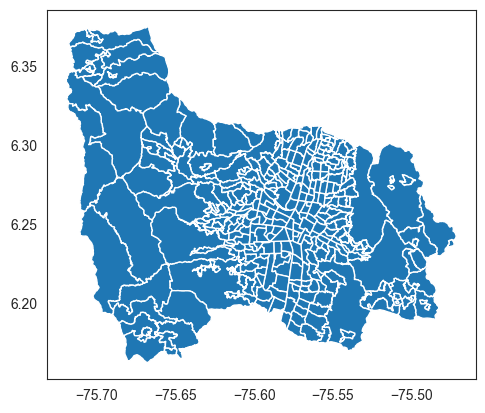

In [105]:
neighborhoods = gpd.read_file('./Data/GeoData/Limite_Barrio_Vereda_Catastral.shp')

# Plot the neighborhood boundaries
neighborhoods.plot()

# Show the plot
plt.show()

In [106]:
neighborhoods = gpd.read_file('./Data/GeoData/Limite_Barrio_Vereda_Catastral.shp')

data = datos[['codigo_comuna', 'cantidad', 'latitud', 'longitud']].copy()
data.rename(columns={"codigo_comuna": "COMUNA"}, inplace=True)
data = data.groupby("COMUNA")['cantidad'].count()

merged = neighborhoods.merge(data, on='COMUNA')

# Plot the heat map using the intensity values
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(column='cantidad', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', 
            legend=True, legend_kwds={'label': 'cantidad', 'orientation': 'horizontal'})
ax.set_title('Heat Map of Medellín Neighborhoods', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_axis_off()

# Show the plot
plt.show()

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

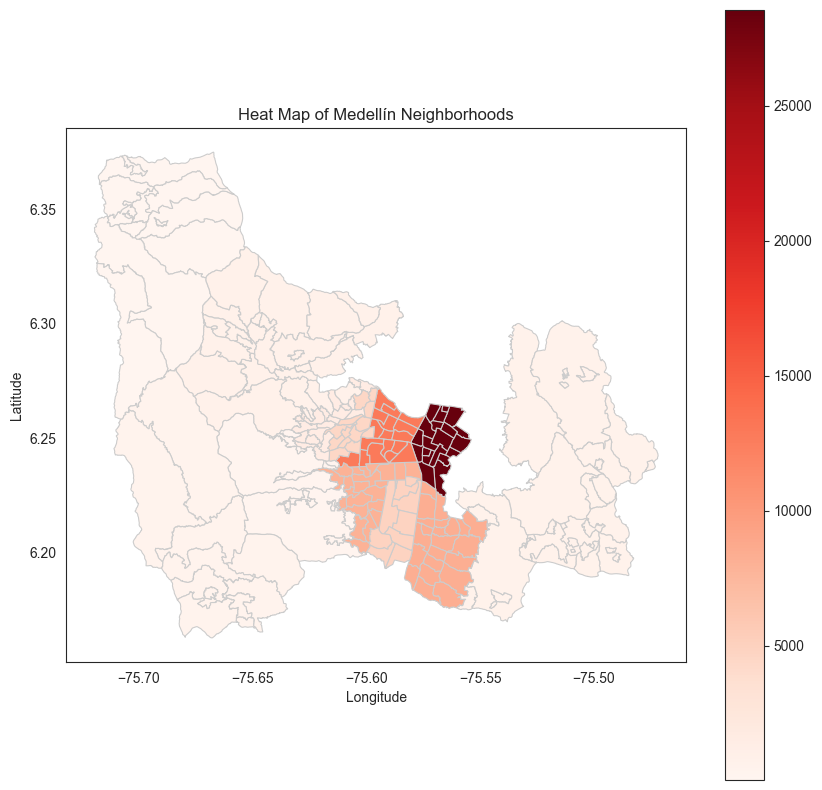

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the heat map using the intensity values
merged.plot(column='cantidad', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the title and axis labels
ax.set_title('Heat Map of Medellín Neighborhoods')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

Se puede evidenciar la vulnerabilidad de la comuna La Candelaria, la cual corresponde más específicamente al centro de Medellín., donde le sigue el barrio Laureles.